# STEAM VIDEO GAMES RECOMMENDATION SYSTEM

we need to recommend the similar games to the user based on their behaviour

#About dataset
This dataset is a list of user behaviors, with columns: user-id, game-title, behavior-name, value. The behaviors included are 'purchase' and 'play'. The value indicates the degree to which the behavior was performed - in the case of 'purchase' the value is always 1, and in the case of 'play' the value represents the number of hours the user has played the game.

steam-200k - (199999, 5)

# Columns in dataset
user-id

game-title

behavior-name

value

0

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
import seaborn as sns
tf.disable_v2_behavior() 
import os

Instructions for updating:
non-resource variables are not supported in the long term


In [8]:
from google.colab import files
uploaded = files.upload()

Saving steam-200k.csv to steam-200k.csv


# EDA

In [3]:
#renaming the column name as games user_id, hoursplay and status
steam_data = pd.read_csv("steam-200k.csv",usecols=[0,1,2,3],names=['userid','game','behavior','hoursplayed'])
steam_data.head()
steam_data.isnull().values.any()
steam_data['userid'] = steam_data.userid.astype(str)
steam_data.describe()

,userid,game,behavior,hoursplayed
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0


False

,hoursplayed
count,200000.000000
mean,17.874384
std,138.056952
min,0.100000
25%,1.000000
50%,1.000000
75%,1.300000
max,11754.000000


In [4]:
steam_data.groupby(['game']).mean().sort_values(by="hoursplayed",ascending=False).head()
steam_data.groupby(['game']).sum().sort_values(by="hoursplayed",ascending=False).head()

,hoursplayed
game,
Eastside Hockey Manager,648.000000
FIFA Manager 09,206.000000
Perpetuum,200.987500
Football Manager 2012,194.501887
Football Manager 2014,194.017722


,hoursplayed
game,
Dota 2,986525.6
Counter-Strike Global Offensive,324183.6
Team Fortress 2,175996.3
Counter-Strike,135117.1
Sid Meier's Civilization V,100417.3


Eastside Hockey Manager has the highest average hours played while Dota 2 has the most hours played.

In [5]:
len(steam_data['game'].unique())
print("\n")
len(steam_data['userid'].unique())

5155

12393

There are 5155 unique games and 12393 unique players in the dataset.

In [6]:
pip install -U matplotlib


## Visualizing data

[Text(0, 0, '4841'),
 Text(0, 0, '2323'),
 Text(0, 0, '1563'),
 Text(0, 0, '1412'),
 Text(0, 0, '981')]

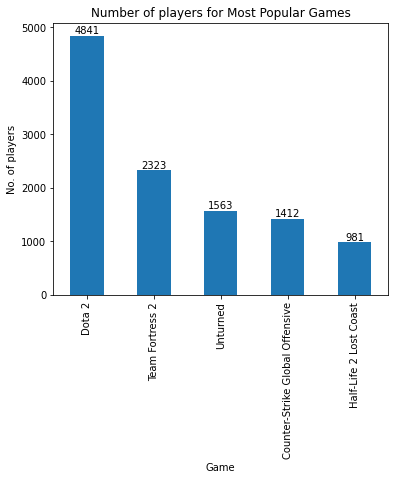

In [7]:
gid = steam_data.groupby('game')['userid'].nunique().sort_values(ascending=False).head()
aix = gid.plot(kind='bar', title='Number of players for Most Popular Games', ylabel='No. of players',
         xlabel='Game', figsize=(6, 5))

aix.bar_label(aix.containers[0])

# for i in aix.containers:
#     aix.bar_label(aix, fmt='%.2f', label_type='edge')

**Feature Engineering and Metrics**

Supposedly if a user plays a game for more than 40 hours, then the user enjoys the game.
Thus, we define a binary column "like" that indicates 1 if the user enjoys the game, and 0 if he/she doesn't.

0    189067
1     10933
Name: like, dtype: int64

,userid,game,behavior,hoursplayed,like
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,1
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,1
4,151603712,Spore,purchase,1.0,0


game
Dota 2                             1417
Counter-Strike Global Offensive     776
Team Fortress 2                     480
The Elder Scrolls V Skyrim          362
Sid Meier's Civilization V          265
Name: like, dtype: int64

game
Dota 2                             4841
Team Fortress 2                    2323
Unturned                           1563
Counter-Strike Global Offensive    1412
Half-Life 2 Lost Coast              981
Name: userid, dtype: int64

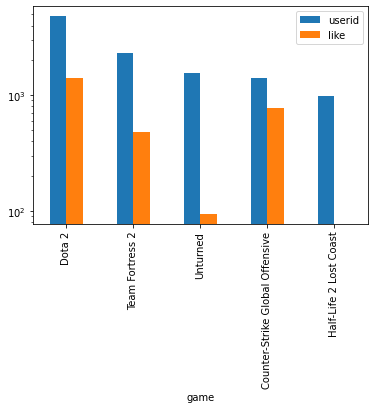

In [8]:
steam_df = steam_data.copy()
steam_df['like'] = [1 if x > 40 else 0 for x in steam_df['hoursplayed']]
steam_df['like'].value_counts()
steam_df.head()

bg=steam_df.groupby('game')['like'].apply(lambda x: (x==1).sum()).sort_values(ascending=False)
bg.head()
gid.head()
#Plot grouped bar-chart of common games
gbg = pd.merge(gid, bg, on='game')
gbc = gbg.plot.bar(logy=True)

From the graph, **Half-Life 2 Lost Coast** had one of the highest unique players of 981 (purchased and played) but none of them played the game more than 40 hours.

Now, let's find those who purchased a game and didn't play it at all.
We would want to reassign hoursplayed for these players to 0 instead of 1.
And change the behavior to play and finally drop rows that are purchase.

This would leave the dataframe to only containing play behaviors and if those that are purchased and not played, the hoursplayed will be 0.

# converting hours to rating

In [9]:
x = steam_df.groupby(['userid', 'game'])['behavior'].size()
s = x[x == 1]
len(s)
len(x)

boolean_index = steam_df.groupby(['userid','game'])['behavior'].transform('size') < 2
steam_df.loc[boolean_index,'hoursplayed'] = 0
steam_df.loc[steam_df['hoursplayed']==0]

steam_df.loc[steam_df.hoursplayed==0,'behavior'] = 'play'

steam_df.loc[steam_df['hoursplayed'] ==0]
steam_df = steam_df[steam_df.behavior != 'purchase']


57904

128804

,userid,game,behavior,hoursplayed,like
52,151603712,Alan Wake,purchase,0.0,0
53,151603712,BioShock 2,purchase,0.0,0
54,151603712,Fallen Earth,purchase,0.0,0
55,151603712,Fallout New Vegas Courier's Stash,purchase,0.0,0
56,151603712,Fallout New Vegas Dead Money,purchase,0.0,0
...,...,...,...,...,...
199947,99096740,The Elder Scrolls V Skyrim - Hearthfire,purchase,0.0,0
199956,176449171,Counter-Strike,purchase,0.0,0
199957,176449171,Counter-Strike Condition Zero,purchase,0.0,0
199958,176449171,Counter-Strike Condition Zero Deleted Scenes,purchase,0.0,0


,userid,game,behavior,hoursplayed,like
52,151603712,Alan Wake,play,0.0,0
53,151603712,BioShock 2,play,0.0,0
54,151603712,Fallen Earth,play,0.0,0
55,151603712,Fallout New Vegas Courier's Stash,play,0.0,0
56,151603712,Fallout New Vegas Dead Money,play,0.0,0
...,...,...,...,...,...
199947,99096740,The Elder Scrolls V Skyrim - Hearthfire,play,0.0,0
199956,176449171,Counter-Strike,play,0.0,0
199957,176449171,Counter-Strike Condition Zero,play,0.0,0
199958,176449171,Counter-Strike Condition Zero Deleted Scenes,play,0.0,0


There are **57904 games** purchased that have not been played yet.
Next, we define the metrics to calculate a simple recommendation based on popularity and what other players like.

In [10]:
# Create a new dataframe to store metrics
d = {'like':'Sum Likes','hoursplayed':'Avg Hours Played'}
metrics_df = steam_df.groupby(['game'], as_index=False).agg({'like':'sum','hoursplayed':'mean'}).rename(columns=d)
metrics_df.loc[metrics_df['game'] == "Dota 2"] #Check Dota 2

# Calculate mean of Hours Played average
c = metrics_df['Avg Hours Played'].mean()
print("Average hours played across all games is " + str(round(c,2)))

# Calculate the minimum number of likes required, set to 95 percentile
m = metrics_df['Sum Likes'].quantile(0.95)
print("Minimum number of likes for a game is " + str(m))

,game,Sum Likes,Avg Hours Played
1336,Dota 2,1417,202.785499


Average hours played across all games is 6.78
Minimum number of likes for a game is 5.0


**Here the cut-off for the minimum number of likes is 5, this mean that there should be at least 5 user that played the game for more than 40 hours.
If a game has no more than 5 likes, we wouldn't recommend it to others.
Now, we can proceed to trim and filter out the dataframe that meet this minimum number of likes.**

In [11]:
metrics_df.shape
metrics_df = metrics_df.loc[metrics_df['Sum Likes'] >= m]
metrics_df.shape
metrics_df.head()


(5155, 3)

(266, 3)

,game,Sum Likes,Avg Hours Played
38,7 Days to Die,22,39.567961
81,APB Reloaded,17,35.256489
84,ARK Survival Evolved,61,83.393252
109,AdVenture Capitalist,33,27.331982
174,Age of Empires II HD Edition,33,28.817227


# **Simple Recommender**

**Next, we will create the scoring system for each game.
Define the score as Average Hours Played for the Game multiplied by Sum Likes Fraction Add Average Hours Across Games multilpied by minimum number of Likes Fraction.**

In [12]:
def weighted_rating(df, m=m, C=c):
    l = df['Sum Likes']
    a = df['Avg Hours Played']
    return (l/(l+m) * a) + (m/(l+m) * C)

metrics_df['score'] = metrics_df.apply(weighted_rating, axis=1)
metrics_df.head()

,game,Sum Likes,Avg Hours Played,score
38,7 Days to Die,22,39.567961,33.495568
81,APB Reloaded,17,35.256489,28.783886
84,ARK Survival Evolved,61,83.393252,77.588993
109,AdVenture Capitalist,33,27.331982,24.627384
174,Age of Empires II HD Edition,33,28.817227,25.917202


In [13]:
metrics_df.sort_values(by=['score'],ascending=False).head(15)

,game,Sum Likes,Avg Hours Played,score
1762,Football Manager 2012,64,385.572500,358.123553
1764,Football Manager 2014,60,382.185000,353.307464
1763,Football Manager 2013,77,310.659615,292.130190
1760,Football Manager 2010,23,345.439474,284.964039
1765,Football Manager 2015,58,307.381013,283.523554
1761,Football Manager 2011,24,333.435294,277.114905
981,Counter-Strike Global Offensive,776,228.591785,227.171716
1336,Dota 2,1417,202.785499,202.096299
1620,FINAL FANTASY XIV A Realm Reborn,9,264.740000,172.610371
3825,Sid Meier's Civilization V,265,167.485403,164.509322


**Using the Simple Recommender score, the top games are**

* Football Manager,
* CSGO,
* Dota 2.

This yields the most popular games/games tha

#Conclusion

We can use different different methods based on our problem statement and dataset. Here we used collaborative filtering technique to recommend games.We can use this method to recommend alot of other things as well such as music, movies, books, news etc. 